# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
import pandas as pd
import openpyxl
import numpy as np

## Read in the file `craftcans.csv`, and look at the first first rows

In [36]:
df = pd.read_csv("craftcans.csv",
                 na_values=['N/A','NaN','Does not apply'])
df.head

<bound method NDFrame.head of                           Beer              Brewery         Location  \
0                 Get Together    NorthGate Brewing  Minneapolis, MN   
1                Maggie's Leap    NorthGate Brewing  Minneapolis, MN   
2                   Wall's End    NorthGate Brewing  Minneapolis, MN   
3                      Pumpion    NorthGate Brewing  Minneapolis, MN   
4                   Stronghold    NorthGate Brewing  Minneapolis, MN   
...                        ...                  ...              ...   
2411  Mama's Little Yella Pils  Oskar Blues Brewery     Longmont, CO   
2412        GUBNA Imperial IPA  Oskar Blues Brewery     Longmont, CO   
2413                  Old Chub  Oskar Blues Brewery     Longmont, CO   
2414         Gordon Ale (2009)  Oskar Blues Brewery     Longmont, CO   
2415           Dale's Pale Ale  Oskar Blues Brewery     Longmont, CO   

                               Style    Size    ABV   IBUs  
0                       American IPA  16 oz.

## How many rows do you have in the data? What are the column types?

In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Beer      2416 non-null   object 
 1   Brewery   2410 non-null   object 
 2   Location  2410 non-null   object 
 3   Style     2405 non-null   object 
 4   Size      2410 non-null   object 
 5   ABV       2348 non-null   object 
 6   IBUs      1405 non-null   float64
dtypes: float64(1), object(6)
memory usage: 132.3+ KB


(2416, 7)

In [4]:
print ("There are 2416 rows and 7 columns. The columns are all objects")

There are 2416 rows and 7 columns. The columns are all objects


# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [5]:
(
    df
    .groupby('Brewery')
    ['IBUs']
    .head(10)
)

0        50.0
1        26.0
2        19.0
3        38.0
4        25.0
        ...  
2399     37.0
2400     34.0
2401     45.0
2402     45.0
2403    120.0
Name: IBUs, Length: 2097, dtype: float64

In [6]:
df['IBUs'] = df['IBUs'].astype(float)
df ['IBUs']

0        50.0
1        26.0
2        19.0
3        38.0
4        25.0
        ...  
2411     35.0
2412    100.0
2413     35.0
2414     85.0
2415     65.0
Name: IBUs, Length: 2416, dtype: float64

In [7]:
print ("Top 10 producers in terms of different cans of beer")
(
    df
    .groupby('Brewery')
    ['IBUs']
    .max(10)
    .sort_values(ascending=False)
    .head(10)
)

Top 10 producers in terms of different cans of beer


Brewery
Astoria Brewing Company               138.0
Wolf Hills Brewing Company            135.0
Cape Ann Brewing Company              130.0
Christian Moerlein Brewing Company    126.0
The Alchemist                         120.0
Surly Brewing Company                 120.0
Buffalo Bayou Brewing Company         118.0
Tin Man Brewing Company               115.0
Atwater Brewery                       115.0
DC Brau Brewing Company               115.0
Name: IBUs, dtype: float64

## What is the most common ABV? (alcohol by volume)

In [8]:
df.ABV.describe()

count      2348
unique       74
top       5.00%
freq        215
Name: ABV, dtype: object

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [9]:
df.ABV.info

<bound method Series.info of 0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object>

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [10]:
df['ABV'] = df['ABV'].str.replace("%", "").astype(float)

In [11]:
df.ABV.head()

0    4.5
1    4.9
2    4.8
3    6.0
4    6.0
Name: ABV, dtype: float64

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [12]:
# Did this in the step above

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [13]:
df.ABV.describe()

count    2348.000000
mean        5.977342
std         1.354173
min         0.100000
25%         5.000000
50%         5.600000
75%         6.700000
max        12.800000
Name: ABV, dtype: float64

In [14]:
import matplotlib

<Axes: >

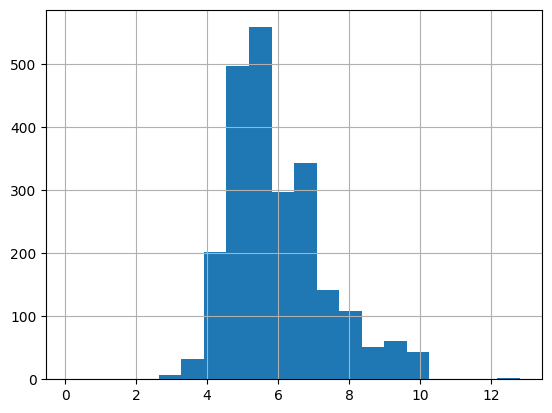

In [15]:
df['ABV'].hist(bins=20)

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [16]:
missing_abv = df['ABV'].isnull()
missing_abv

0       False
1       False
2       False
3       False
4       False
        ...  
2411    False
2412    False
2413    False
2414    False
2415    False
Name: ABV, Length: 2416, dtype: bool

In [17]:
missing_count = missing_abv.sum()
missing_count

np.int64(68)

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [18]:
df = pd.read_csv("craftcans.csv",
                 na_values=['Does not apply'])
df['Location'].drop_duplicates().head(10)

0       Minneapolis, MN
6        Louisville, KY
19       Framingham, MA
24        San Diego, CA
30    San Francisco, CA
34       Charleston, SC
40           Denver, CO
49         Bridgman, MI
50          Holland, MI
51     Grand Rapids, MI
Name: Location, dtype: object

## List all of the beer from Brooklyn, NY

In [19]:
brooklyn_rows = df[df['Location'].str.contains('Brooklyn', case=False, na=False)]
brooklyn_rows

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.00%,52.0
146,Todd the Axe Man,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,7.20%,NaN
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.20%,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.00%,NaN
280,Doomtree,Surly Brewing Company,"Brooklyn Center, MN",Extra Special / Strong Bitter (ESB),16 oz.,5.70%,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.00%,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.20%,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.50%,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.50%,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.70%,50.0


In [20]:
brooklynbeer = df[df['Location'] == 'Brooklyn, NY']
brooklynbeer.shape

(38, 7)

In [21]:
brooklynbeer = df[df['Location'] == 'Brooklyn, NY']
brooklynbeer.head(38)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.00%,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.20%,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.00%,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.00%,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.20%,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.50%,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.50%,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.70%,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.90%,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.70%,19.0


## What brewery in Brooklyn puts out the most different cans of beer?

In [22]:
(
    brooklynbeer
    .groupby('Brewery')
    ['Beer']
    .nunique()
    .sort_values(ascending=False)
    .head(1)
)

Brewery
Sixpoint Craft Ales    24
Name: Beer, dtype: int64

## What are the five most common styles of beer produced by Sixpoint?

In [23]:
sixpoint = df[df['Brewery'] == 'Sixpoint Craft Ales']
sixpoint.shape

(24, 7)

In [24]:
sixpoint.head(24)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.00%,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.20%,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.00%,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.20%,7.0
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.50%,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.70%,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.90%,111.0
1057,Global Warmer,Sixpoint Craft Ales,"Brooklyn, NY",American Strong Ale,12 oz.,7.00%,70.0
1074,Autumnation (2013),Sixpoint Craft Ales,"Brooklyn, NY",American IPA,16 oz.,6.70%,74.0
1267,The Crisp,Sixpoint Craft Ales,"Brooklyn, NY",German Pilsener,16 oz.,5.40%,42.0


In [25]:
(
    sixpoint
    .groupby('Brewery')
    ['Style']
    .value_counts()
    .head(5)
)

Brewery              Style                         
Sixpoint Craft Ales  American IPA                      4
                     American Double / Imperial IPA    2
                     Baltic Porter                     2
                     Cream Ale                         2
                     German Pilsener                   2
Name: count, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [26]:
nystate = df[df['Location'].str.contains('NY', case=False, na=False)]
nystate

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.00%,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.20%,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.00%,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.00%,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.20%,7.0
...,...,...,...,...,...,...,...
2351,Brooklyn Lager (12 oz.),Brooklyn Brewery,"Brooklyn, NY",American Amber / Red Lager,12 oz.,5.20%,NaN
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.90%,NaN
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.80%,NaN
2366,Moo Thunder Stout,Butternuts Beer and Ale,"Garrattsville, NY",Milk / Sweet Stout,12 oz.,4.90%,NaN


In [27]:
nystate2 = df[df['Location'].str.contains('New York', case=False, na=False)]
nystate2.shape

(3, 7)

### Now *count* all of the breweries in New York state

In [28]:
nystate.groupby('Location')['Brewery'].count()

Location
Bronx, NY             3
Brooklyn, NY         38
Chatham, NY           2
Elmira, NY            2
Garrattsville, NY     4
Montauk, NY           2
New York, NY          3
Newburgh, NY          1
Patchogue, NY         4
Rochester, NY         1
Southampton, NY       1
Utica, NY            13
Name: Brewery, dtype: int64

In [29]:
nystate['Brewery'].count()

np.int64(74)

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [30]:
ipa = df[df['Style'].str.contains('IPA', case=False, na=False)]
ipa.shape

(571, 7)

In [31]:
ipa.head(57)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.60%,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.00%,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.00%,100.0
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.50%,85.0
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.00%,100.0
33,Villager,Fort Point Beer Company,"San Francisco, CA",American IPA,12 oz.,6.30%,42.0
38,HopArt,COAST Brewing Company,"Charleston, SC",American IPA,16 oz.,7.70%,NaN
39,Boy King,COAST Brewing Company,"Charleston, SC",American Double / Imperial IPA,16 oz.,9.70%,NaN


In [32]:
ipa2 = df[df['Style'].str.contains('Indian Pale Ale', case=False, na=False)]
ipa2.shape

(0, 7)

IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [61]:
df['IBU'].describe()

count    2348.000000
mean        5.977342
std         1.354173
min         0.100000
25%         5.000000
50%         5.600000
75%         6.700000
max        12.800000
Name: IBU, dtype: float64

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [67]:
df['IBUs'] = df['IBUs'].astype(float)
df['IBUs'].head(10)

0    50.0
1    26.0
2    19.0
3    38.0
4    25.0
5    47.0
6    68.0
7    80.0
8    25.0
9    42.0
Name: IBUs, dtype: float64

In [68]:
df['IBUs'].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

<Axes: >

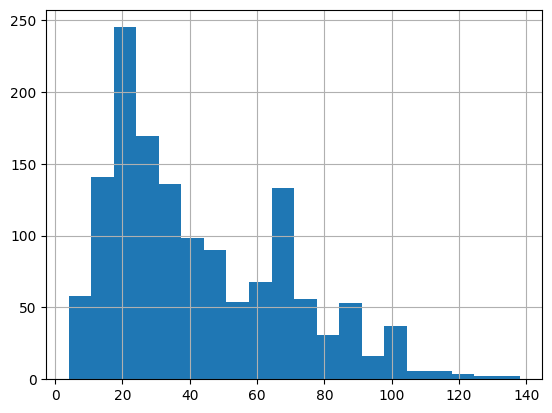

In [69]:
df['IBUs'].hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [70]:
sevenfivedf = df[df['IBUs'] > 64]
sevenfivedf

,Beer,Brewery,Location,Style,Size,ABV,IBUs,IBU
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68.0,8.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.50%,80.0,12.5
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.60%,68.0,7.6
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.00%,65.0,6.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.20%,80.0,7.2
...,...,...,...,...,...,...,...,...
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.00%,65.0,7.0
2410,Ten Fidy Imperial Stout,Oskar Blues Brewery,"Longmont, CO",Russian Imperial Stout,12 oz.,9.90%,98.0,9.9
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.90%,100.0,9.9
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.70%,85.0,8.7


<Axes: >

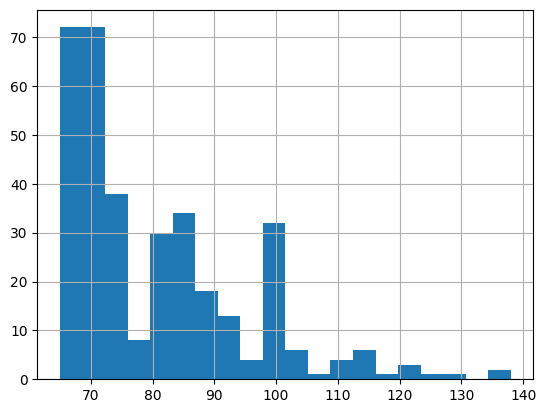

In [71]:
sevenfivedf['IBUs'].hist(bins=20)

## List all of the beers with IBUs below the 25th percentile

In [74]:
twofivedf = df[df['IBUs'] < 21]
twofivedf.shape

(338, 8)

In [76]:
with pd.option_context('display.max_rows', None):
    print(twofivedf.head(338))

                                             Beer  \
2                                      Wall's End   
12                                       Sho'nuff   
13                                    Bloody Show   
18                                 The Brown Note   
19                                    House Lager   
20                                   Leisure Time   
30                                           Park   
31                                      Westfalia   
32                                            KSA   
54                                        Sparkle   
56                                   Hotbox Brown   
57                                           Gold   
66                                     Cafe Leche   
67                         Damascene Apricot Sour   
90                                    Sex Panther   
102                                Vanilla Porter   
105                                          Gose   
106                               Vermont Pils

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [59]:
#Calculate median IBU of one type of beer e.g. American Blonde Ale
df[df['Style'] == ('American Blonde Ale')]

,Beer,Brewery,Location,Style,Size,ABV,IBUs,IBU
57,Gold,Perrin Brewing Company,"Comstock Park, MI",American Blonde Ale,12 oz.,4.80%,15.0,4.8
85,Blonde Czich,Evil Czech Brewery,"Mishawaka, IN",American Blonde Ale,16 oz.,4.90%,23.0,4.9
133,Nordic Blonde,Bent Brewstillery,"Roseville, MN",American Blonde Ale,12 oz.,5.70%,27.0,5.7
145,Send Help,4 Hands Brewing Company,"Saint Louis, MO",American Blonde Ale,12 oz.,4.50%,18.0,4.5
171,Beach Blonde,3 Daughters Brewing,"St Petersburg, FL",American Blonde Ale,12 oz.,5.00%,NaN,5.0
...,...,...,...,...,...,...,...,...
2272,Summer Honey,Big Sky Brewing Company,"Missoula, MT",American Blonde Ale,12 oz.,4.70%,NaN,4.7
2283,Gossamer Golden Ale,Half Acre Beer Company,"Chicago, IL",American Blonde Ale,16 oz.,4.20%,NaN,4.2
2346,True Blonde Ale,Ska Brewing Company,"Durango, CO",American Blonde Ale,12 oz.,5.30%,NaN,5.3
2358,Pick Axe Blonde Ale,Keweenaw Brewing Company,"Houghton, MI",American Blonde Ale,12 oz.,NaN,NaN,NaN


In [94]:
import statistics
df[df['Style'] == ('American Blonde Ale')]
median = (
    df
    [df['Style'] == ('American Blonde Ale')]
    ['IBUs'].median()
)
print (round(median, 2))

20.0


In [102]:
df[df['Style'] == style.dropna()]
median_ibu = []
for style in df['Style']:
    median = df[df['Style'] == style]['IBUs'].median()
    median_ibu.append((style, round(median, 2)))

AttributeError: 'str' object has no attribute 'dropna'

In [108]:
median_ibu = []
for style in df['Style'].unique():
    style_ibus = df[df['Style'] == style]['IBUs'].dropna()
    if not style_ibus.empty:
        median = style_ibus.median()
        median_ibu.append((style, round(median, 2)))
    
median_ibu


[('American IPA', np.float64(69.0)),
 ('Milk / Sweet Stout', np.float64(25.5)),
 ('English Brown Ale', np.float64(20.5)),
 ('Pumpkin Ale', np.float64(20.0)),
 ('American Porter', np.float64(31.0)),
 ('Extra Special / Strong Bitter (ESB)', np.float64(41.0)),
 ('American Double / Imperial IPA', np.float64(91.0)),
 ('English Barleywine', np.float64(60.0)),
 ('American Pale Ale (APA)', np.float64(44.0)),
 ('German Pilsener', np.float64(35.0)),
 ('Belgian Pale Ale', np.float64(21.0)),
 ('American Pilsner', np.float64(21.5)),
 ('Saison / Farmhouse Ale', np.float64(30.0)),
 ('American Wild Ale', np.float64(27.0)),
 ('Keller Bier / Zwickel Bier', np.float64(20.0)),
 ('American Pale Lager', np.float64(18.5)),
 ('American India Pale Lager', np.float64(65.0)),
 ('Wheat Ale', np.float64(24.0)),
 ('Cream Ale', np.float64(20.0)),
 ('Kölsch', np.float64(22.0)),
 ('American Pale Wheat Ale', np.float64(20.0)),
 ('American Amber / Red Ale', np.float64(31.0)),
 ('American Double / Imperial Stout', np.flo

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [109]:
median_ibu_df = pd.DataFrame(median_ibu, columns=['Style', 'Median IBU'])

print(median_ibu_df)

                                 Style  Median IBU
0                         American IPA        69.0
1                   Milk / Sweet Stout        25.5
2                    English Brown Ale        20.5
3                          Pumpkin Ale        20.0
4                      American Porter        31.0
..                                 ...         ...
85                         Smoked Beer        35.0
86                 Munich Dunkel Lager        21.0
87  American Double / Imperial Pilsner        85.0
88                  Flanders Oud Bruin        23.0
89                            Grisette        25.0

[90 rows x 2 columns]


In [110]:
median_ibu_df['Median IBU'].describe()

count    90.000000
mean     33.000000
std      19.692581
min       8.000000
25%      21.000000
50%      25.000000
75%      39.125000
max      96.000000
Name: Median IBU, dtype: float64

In [122]:
highibu = (
    median_ibu_df[median_ibu_df['Median IBU'] > 39.125]
    .groupby('Style')
    .value_counts()
    .head(5)
)
print (highibu)

Style                               Median IBU
American Barleywine                 96.0          1
American Black Ale                  73.0          1
American Double / Imperial IPA      91.0          1
American Double / Imperial Pilsner  85.0          1
American Double / Imperial Stout    51.0          1
Name: count, dtype: int64


In [123]:
lowibu = (
    median_ibu_df[median_ibu_df['Median IBU'] < 21]
    .groupby('Style')
    .value_counts()
    .head(5)
)
print (lowibu)

Style                    Median IBU
American Adjunct Lager   9.0           1
American Blonde Ale      20.0          1
American Pale Lager      18.5          1
American Pale Wheat Ale  20.0          1
Berliner Weissbier       8.0           1
Name: count, dtype: int64


## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [133]:
wheatbeers = ['Witbier', 'Hefeweizen', 'American Pale Wheat Ale']
wheat_df = df[df['Style'].isin(wheatbeers)]
mean_ibu = wheat_df['IBUs'].mean()
print (round(mean_ibu,2))

18.98


## Draw a histogram of the IBUs of those beers

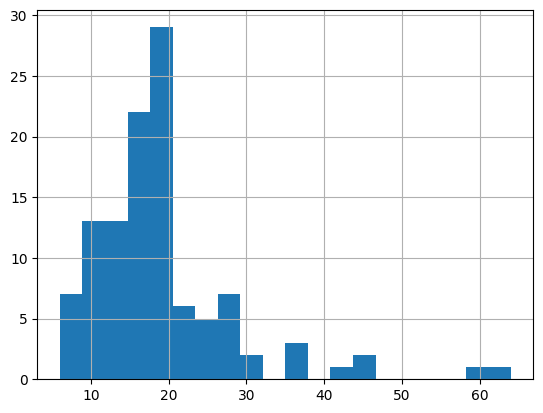

In [134]:
mean_ibu = wheat_df['IBUs'].hist(bins=20)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

<Axes: >

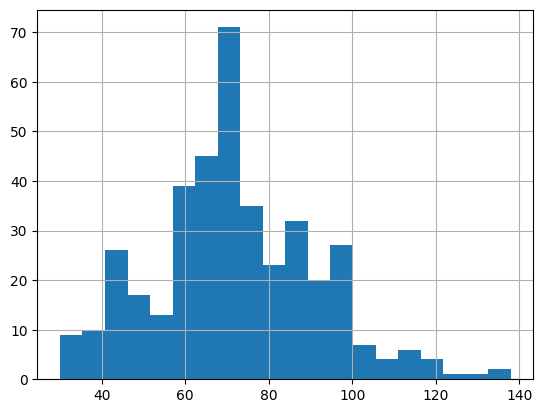

In [139]:
ipabeers = df[df['Style'].str.contains('IPA', case=False, na=False)]
ipabeers['IBUs'].hist(bins=20)

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

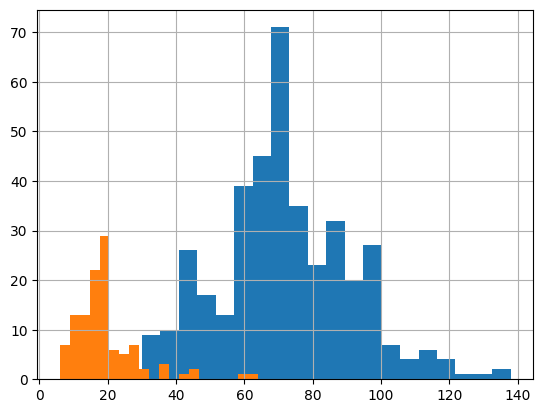

In [158]:
ipabeers['IBUs'].hist(bins=20)
mean_ibu = wheat_df['IBUs'].hist(bins=20)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [162]:
ipabeers['ABV'].describe()

count       560
unique       61
top       7.00%
freq         62
Name: ABV, dtype: object

In [163]:
wheat_df['ABV'].describe()

count       183
unique       31
top       5.00%
freq         36
Name: ABV, dtype: object

In [ ]:
# IPAs hav a higher maximum ABV compared to wheat beers

## Good work!